In [104]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas
import datetime
import seaborn as sns

In [134]:
start = 0
data = pandas.read_csv('selected.csv')
dates = [datetime.datetime.strptime(i, '%m/%d/%y').date() for i in data.columns[4+start:]]
columns = [(i if i else j) for (i,j) in data.iloc[:,:2].fillna('').to_numpy()]


tdata = data.iloc[:,4+start:].T.to_numpy()
# Normalize to populations. It makes no sense to compare otherwise.
populations = [331002651,67886011,65273511,46754778,60461826, 59020000]
rawdata = pandas.DataFrame(tdata, dates, columns=columns)
data = rawdata / populations
columns
# data = np.exp(np.log(1e-12 + data).rolling(3).mean())


['US', 'United Kingdom', 'France', 'Spain', 'Italy', 'Hubei']

In [135]:
l = np.log(rawdata.iloc[-1,1])
x = l - np.log(rawdata.iloc[-2,1])
np.exp(l + x) # Crude prediction for UK

1368.064558629776

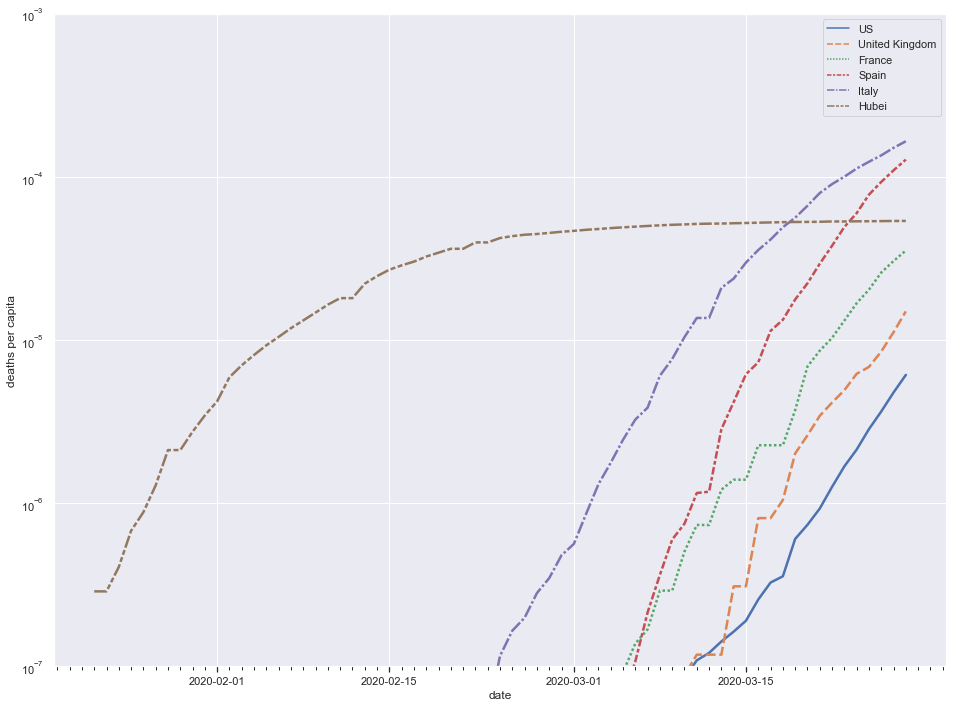

In [136]:
plt.figure(figsize=(16,12))
plt.ylim(1e-7, 1e-3)
plt.xlabel('date')
plt.ylabel('deaths per capita')
minorLocator = matplotlib.ticker.MultipleLocator(1)

sns.set_style("darkgrid")
sns.set()
plt.rcParams.update({"xtick.bottom" : True, "ytick.left" : False})
g = sns.lineplot(data=data, linewidth=2.5)
g.xaxis.set_minor_locator(minorLocator)
g.set_yscale('log')